In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from collections import Counter
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,euclidean_distances
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.datasets import make_blobs,load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)
from some_library import Kernel

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ModuleNotFoundError: No module named 'some_library'

In [ ]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join( '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

CMAP = plt.cm.rainbow
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.2

NOISE = 0.2
N_SAMPLE = 1024

In [ ]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [ ]:
def fn_plot_decision_boundary(pred_func,X,y,ax=None):
    if ax is None:
        ax = plt.gca()
        
    xMin, xMax = X[:,0].min() - .05, X[:,0].max() + .05
    yMin, yMax = X[:,1].min() - .05, X[:,1].max() + .05
    
    h = 0.05
    
    xx,yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax,h))
    
    Z = pred_func.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap = CMAP, alpha = 0.6)
    
    ax.scatter(X[:,0], X[:,1], c=y, cmap = CMAP, edgecolors = 'black')

In [2]:
def fn_svc_decision_boundary(clf):
    x = np.linspace(plt.xlim()[0],plt.xlim()[1],30)
    y = np.linspace(plt.ylim()[0],plt.ylim()[1],30)
    Y,X = np.meshgrid(y,x)
    
    p = np.zeros_like(X)
    
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            p[i,j] = clf.decision_function(np.array([xi,yj]).reshape(1,-1))[0]
            
    return plt.contour(X,Y,p, color = 'k', levels = [-1,0,1], linestyle = ['--','-','--'])            

In [3]:
X,y = make_blobs(n_samples=N_SAMPLE,centers=2, random_state=RANDOM_STATE,cluster_std = 0.6)

fig,ax = plt.subplots()

ax.scatter(X[:,0], X[:,1], c = y, cmap = CMAP)
#plt.xlim(). plt.ylim()

NameError: name 'N_SAMPLE' is not defined

### Support Vector Machines

In [4]:
clf = SVC(kernel = 'linear')

clf.fit(X,y)

NameError: name 'X' is not defined

NameError: name 'X' is not defined

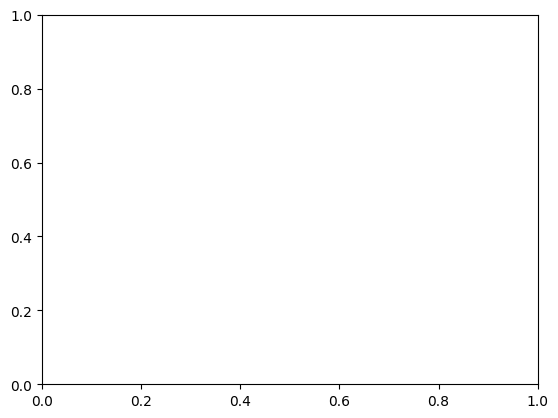

In [5]:
fig,ax = plt.subplots()

ax.scatter(X[:,0], X[:,1], c = y, cmap = CMAP)

fn_svc_decision_boundary(clf)

plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
           s = 200, edgecolors = 'k', facecolor = 'none')

In [6]:
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [9]:
pd.DataFrame(digits.data,columns = digits.feature_names)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [10]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   stratify = digits.target,
                                                   random_state = RANDOM_STATE)

NameError: name 'RANDOM_STATE' is not defined

NameError: name 'X_train' is not defined

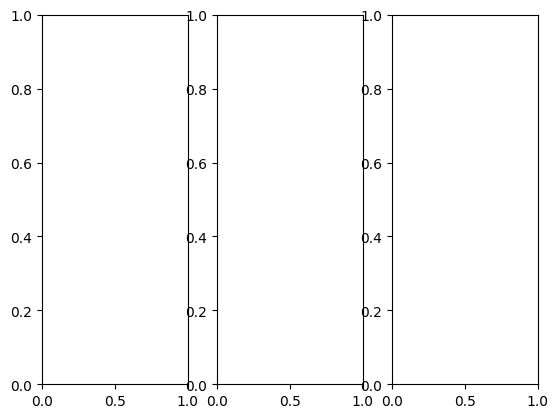

In [12]:
fig, axes = plt.subplots(1,3)

for count, kernel in enumerate(['linear','rbf','poly']):
    
    #instantiate
    clf = SVC(kernel = kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"SVC : kernel {kernel:<7}", end = '|')
    print(f"F1 Score : {f1_score(y_test, y_pred, average = 'weighted')}")
    
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = digits.target_names)
    
    disp.plot(ax = axes[count], cmap = plt.cm.Blues, colorbar = False)
    axes[count].grid()
    axes[count].set_title(f"kernel:{kernel}")
plt.tight_layout()

### Linear Models and non-linear data

In [13]:
X, y = make_blobs(centers = 4, random_state = RANDOM_STATE)

plt.scatter(X[:,0], X[:,1], c = y, cmap = CMAP)

NameError: name 'RANDOM_STATE' is not defined

In [14]:
y = y % 2
plt.scatter(X[:,0], X[:,1], c=y, cmap = CMAP)

NameError: name 'y' is not defined

In [15]:
linear_svm = LinearSVC(dual='auto',random_state = RANDOM_STATE)
linear_svm.fit(X,y)

fn_plot_decision_boundary(linear_svm, X ,y)

NameError: name 'RANDOM_STATE' is not defined

In [16]:
X_new = np.hstack([X ,X[:,1:]**2])
X.shape, X_new.shape

NameError: name 'X' is not defined

NameError: name 'X_new' is not defined

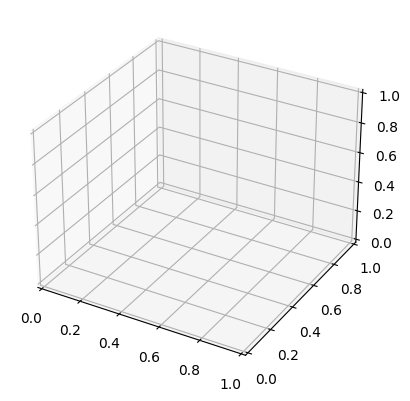

In [17]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

ax = plt.figure().add_subplot(projection='3d')

ax.scatter(X_new[:,0], X_new[:,1], X_new[:,2], c=y, cmap = 'autumn_r');

ax.view_init(elev=30,azim=40, roll=0)           # changing the view point

In [18]:
linear_svm_3d = LinearSVC(dual='auto',random_state = RANDOM_STATE)
linear_svm_3d.fit(X_new,y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
coef, intercept

NameError: name 'RANDOM_STATE' is not defined

NameError: name 'X_new' is not defined

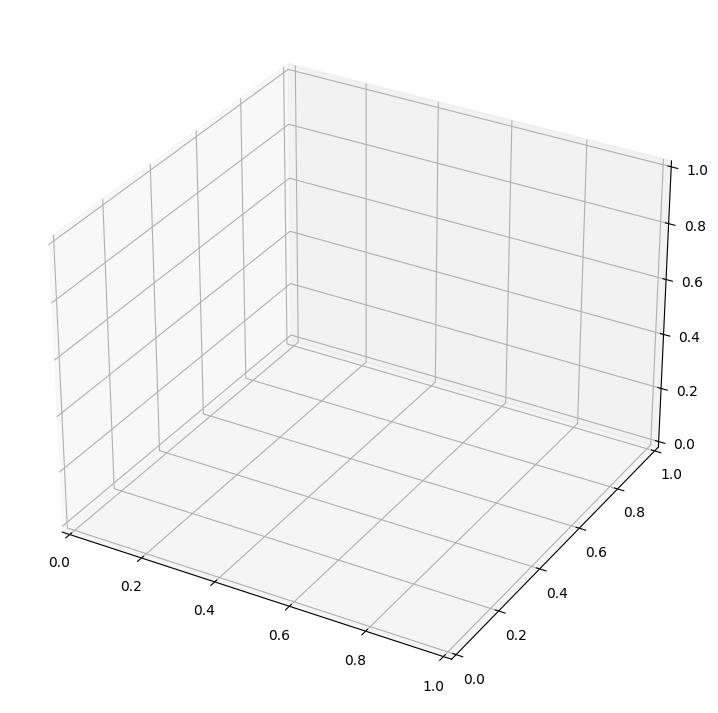

In [19]:
ax = plt.figure(figsize = (9,9)).add_subplot(projection='3d')

ax.scatter(X_new[:,0], X_new[:,1], X_new[:,2], c=y, cmap = 'autumn_r');

ax.view_init(elev=30,azim=40, roll=0)

xx = np.linspace(X_new[:,0].min() -2, X_new[:,0].max() + 2, 50)

yy = np.linspace(X_new[:,1].min() -2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx,yy)

ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.8)

### Parameter Tuning

In [20]:
-Kernel
-C 
-Gamma

NameError: name 'Kernel' is not defined

In [21]:
iris_file = os.path.join(inpDir, 'iris.csv')
iris_features = ['sepal length',
                'sepal width',
                'petal length',
                'petal width','target']     # create list containing all column names
iris_df = pd.read_csv(iris_file,
                 skiprows = 1,        # ignore first row
                 sep = ',',            # using separator as ,
                 header = None,       # no column names
                 names = iris_features)       # use these column names
target_names = ['setosa','versicolor','virginica']

formatter = plt.FuncFormatter(lambda i, *args: target_names[int(i)])

iris_df.head()  # corrected here


NameError: name 'inpDir' is not defined

In [22]:
from sklearn.decomposition import PCA

# Assuming iris_df is your features DataFrame
features_df = iris_df.drop('target', axis=1)

pca = PCA(n_components=2)
pca_feat = pca.fit_transform(features_df)

print(pca_feat.shape)  # corrected here


NameError: name 'iris_df' is not defined

In [23]:
fig = plt.figure(figsize = (15,4))

C_values = [0.001,1,1000]

i = 1

for C in C_values:
    clf = SVC(kernel = 'linear',C=C)
    
    clf.fit(pca_feat,labels)
    
    y_pred = clf.predict(pca_feat)
    
    ax = fig.add_subplot(1,3,i)
    
    ax.set_title(f'C: {C}')
    
    i+= 1
    
    fn_plot_decision_boundary(clf,pca_feat,labels,ax = ax)
    

NameError: name 'pca_feat' is not defined

<Figure size 1500x400 with 0 Axes>

### Gama

In [24]:
-le-3
-1.0
-'auto'

NameError: name 'le' is not defined

In [25]:
fig = plt.figure(figsize = (15,4))

gammas = [1e-3,1.0,'auto']

i = 1

for g in gammas:
    clf = SVC(kernel = 'rbf',gamma=g)
    
    clf.fit(pca_feat,labels)
    
    y_pred = clf.predict(pca_feat)
    
    ax = fig.add_subplot(1,3,i)
    
    ax.set_title(f'C: {C}')
    
    i+= 1
    
    fn_plot_decision_boundary(clf,pca_feat,labels,ax = ax)

NameError: name 'pca_feat' is not defined

<Figure size 1500x400 with 0 Axes>

### Nearest Neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
clf = KNeighborsClassifier(n_neighbors=1)

clf.fit(features_df, labels)

y_pred = clf.predict(features_df)

print(np.all(labels == y_pred))

NameError: name 'features_df' is not defined

In [28]:
confusion_matrix(labels,y_pred)

NameError: name 'labels' is not defined

In [29]:
def fn_knn_classification(X_train, y_train,X_test, n_neighbors = 1):
    dist = euclidean_distances(X_train,X_test)
    closest = np.argsort(dist, axis = 0)
    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbor[:n_neighbors]:
            plt.arrow(X[0],X[1], X[neighbor,0]- X[0],X[neighbor,1]-X[1]
                     head_width = 0, fc = 'k', ec = 'k')
    clf = KNeighborClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    plt.scatter(X_train[:,0], X_train[:,1],s=30, c= y_train
            

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3171838309.py, line 6)

In [30]:
sc = StandardSclar()
X_train = sc.fit_transfom(X_train)
X_train = sc.transform(X_test)
ida = LineraDiscriminantAnalysis(n_components=2)
X_train2 = lda.fit_tramsform(X_train,y_train)
X_test2 = lda.tramsform(X_test)

NameError: name 'StandardSclar' is not defined

In [31]:
n_neighbor

NameError: name 'n_neighbor' is not defined